# Sample Outline

* Cosine similarity matrix to audit for duplicate contents from a list of 2000+ pages 
* K-Means clustering analysis to group large amount of data for optimal page categorization for SEO
* KPIs analysis including cost per lead, customer lifetime value, frequency sold with
* Revenue growth trends for the last 5 years
* Category/Product Segmentations

***
# Cosine Similary Matrix

The goal of this analysis to identify pages on a large website that have written content at least 80% similarity score to the content of other pages on the same website. Google Search Engine penalizes websites that it identifies to have deceptive practices including having maliciously duplicated contents. 

It is harmless in some cases to have duplicate contents if the pages are properly treated such as using 301 redirects and canonical (rel="canonical") so that Google's crawler would know the right URL to crawl. Identifying all pages with similar or identical contents would enable an thourough audit to ensure each pages are treated properly.

## Import Packages

In [1]:
import string
import pandas as pd
import numpy as np

# for graphing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# import scikit-learn components
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

In [2]:
# set preferences
pd.set_option("display.max_rows", 999)

# for graphing
rcParams['axes.labelpad'] = 10
rcParams['axes.titlepad'] = 15

## Import Data

In [3]:
cat_df = pd.read_csv('all cat description.csv')
x = cat_df.copy()
cat_df = cat_df.set_index(['id'])
cat_df.head()

,description
id,
1,With R.S. Hughes you can choose from thousands...
2,Do you need to store something? R.S. Hughes Co...
3,R.S. Hughes Company makes shipping your gift i...
4,R.S. Hughes Company offers many different type...
5,Shop cardboard mailers online and save at R.S....


## Clean Data

In [4]:
# get descriptions
desc = cat_df.values

# stop words
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [5]:
def clean_data (text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# removed stop words
cleaned = list(map(clean_data, desc))

## Similarity Analysis

In [6]:
# strings to numerical vectors 
vectorizer = CountVectorizer().fit_transform(cleaned)
vect = vectorizer.toarray()

# create similarity matrix
sim = cosine_similarity(vect)

# convert to dataframe
text_sim = pd.DataFrame(sim)
text_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473
0,1.000000,0.442410,0.435775,0.557594,0.432298,0.538661,0.467306,0.412843,0.337943,0.266707,...,0.134965,0.220058,0.122772,0.053066,0.200486,0.165137,0.043189,0.125661,0.061078,0.071982
1,0.442410,1.000000,0.657377,0.787564,0.667081,0.474092,0.351432,0.249334,0.198897,0.170214,...,0.112430,0.144275,0.119851,0.055256,0.130477,0.197748,0.037477,0.130849,0.042400,0.091609
2,0.435775,0.657377,1.000000,0.684572,0.606531,0.484015,0.377909,0.222576,0.229725,0.185535,...,0.077615,0.114246,0.140654,0.045775,0.135110,0.186964,0.062092,0.127027,0.032929,0.120735
3,0.557594,0.787564,0.684572,1.000000,0.732542,0.553446,0.421845,0.343110,0.250490,0.183340,...,0.095871,0.164999,0.130814,0.045233,0.160214,0.167156,0.030679,0.125524,0.032540,0.110784
4,0.432298,0.667081,0.606531,0.732542,1.000000,0.483459,0.352310,0.273899,0.192009,0.164319,...,0.090447,0.147472,0.115700,0.074680,0.125958,0.157699,0.043414,0.102633,0.040932,0.112556


In [7]:
sim_df = cat_df.copy()

# dropping the index
sim_df.index.name = None
sim_df.head()

,description
1,With R.S. Hughes you can choose from thousands...
2,Do you need to store something? R.S. Hughes Co...
3,R.S. Hughes Company makes shipping your gift i...
4,R.S. Hughes Company offers many different type...
5,Shop cardboard mailers online and save at R.S....


In [8]:
s = pd.Series(sim_df.index)
text_sim.columns = s
text_sim.index = s
text_sim.head()

,1,2,3,4,5,6,7,8,9,10,...,1207304,1211604,1212604,1215200,1216404,1217404,1218400,1219104,1246100,1246404
1,1.000000,0.442410,0.435775,0.557594,0.432298,0.538661,0.467306,0.412843,0.337943,0.266707,...,0.134965,0.220058,0.122772,0.053066,0.200486,0.165137,0.043189,0.125661,0.061078,0.071982
2,0.442410,1.000000,0.657377,0.787564,0.667081,0.474092,0.351432,0.249334,0.198897,0.170214,...,0.112430,0.144275,0.119851,0.055256,0.130477,0.197748,0.037477,0.130849,0.042400,0.091609
3,0.435775,0.657377,1.000000,0.684572,0.606531,0.484015,0.377909,0.222576,0.229725,0.185535,...,0.077615,0.114246,0.140654,0.045775,0.135110,0.186964,0.062092,0.127027,0.032929,0.120735
4,0.557594,0.787564,0.684572,1.000000,0.732542,0.553446,0.421845,0.343110,0.250490,0.183340,...,0.095871,0.164999,0.130814,0.045233,0.160214,0.167156,0.030679,0.125524,0.032540,0.110784
5,0.432298,0.667081,0.606531,0.732542,1.000000,0.483459,0.352310,0.273899,0.192009,0.164319,...,0.090447,0.147472,0.115700,0.074680,0.125958,0.157699,0.043414,0.102633,0.040932,0.112556


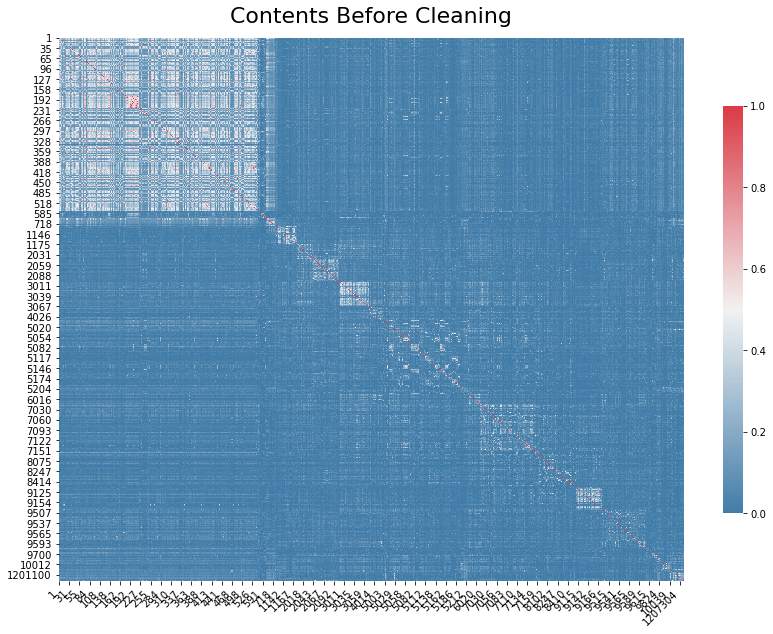

In [9]:
# similarity matrix visualization

plt.figure(figsize=(14,10))
plt.tight_layout()
plt.title('Contents Before Cleaning', fontsize=22)

ax = sns.heatmap(
    text_sim,
    vmin=0, 
    vmax=1, 
    center=0.5, 
    cmap=sns.diverging_palette(240, 10, as_cmap=True), 
    cbar_kws={"shrink": 0.75}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
text_sim = text_sim.replace(1,0)
text_sim = text_sim.mask(np.tril(np.ones(text_sim.shape)).astype(bool))
text_sim.head()

,1,2,3,4,5,6,7,8,9,10,...,1207304,1211604,1212604,1215200,1216404,1217404,1218400,1219104,1246100,1246404
1,NaN,0.44241,0.435775,0.557594,0.432298,0.538661,0.467306,0.412843,0.337943,0.266707,...,0.134965,0.220058,0.122772,0.053066,0.200486,0.165137,0.043189,0.125661,0.061078,0.071982
2,NaN,NaN,0.657377,0.787564,0.667081,0.474092,0.351432,0.249334,0.198897,0.170214,...,0.112430,0.144275,0.119851,0.055256,0.130477,0.197748,0.037477,0.130849,0.042400,0.091609
3,NaN,NaN,NaN,0.684572,0.606531,0.484015,0.377909,0.222576,0.229725,0.185535,...,0.077615,0.114246,0.140654,0.045775,0.135110,0.186964,0.062092,0.127027,0.032929,0.120735
4,NaN,NaN,NaN,NaN,0.732542,0.553446,0.421845,0.343110,0.250490,0.183340,...,0.095871,0.164999,0.130814,0.045233,0.160214,0.167156,0.030679,0.125524,0.032540,0.110784
5,NaN,NaN,NaN,NaN,NaN,0.483459,0.352310,0.273899,0.192009,0.164319,...,0.090447,0.147472,0.115700,0.074680,0.125958,0.157699,0.043414,0.102633,0.040932,0.112556


In [11]:
print("Number of total pairs:", (len(text_sim) * (len(text_sim) - 1))/2)

Number of total pairs: 1085601.0


## Results

In [12]:
text_sim = text_sim.mask(np.tril(np.ones(text_sim.shape)).astype(bool))
text_sim = text_sim.fillna(0)

def highest_correlations(dataframe):
    s = dataframe.unstack()
    so = s.sort_values(kind="quicksort")
    print(so[-10:])
    
highest_correlations(text_sim)

1155  1154    1.0
3009  3008    1.0
5192  5044    1.0
5137  5050    1.0
5150  5069    1.0
3037  3036    1.0
3067  3053    1.0
175   174     1.0
2039  2038    1.0
5196  5131    1.0
dtype: float64


***
# K-Means Clustering Analysis

The goal of this analysis is to determine all the meaningful category groups for data parsing. The category and product datasets are too large to process manually to determime categorization. Here, I use K-Means to group similar products or category pages together and to gain insight on how to frame the architecture of a parent category.

## Import Packages

In [13]:
# initiation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# scikit-learn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# clean
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



## Import Data

In [14]:
# import excel-cleaned category dataset
ppe_cat_df = pd.read_csv("ppe_cat.csv")
x = ppe_cat_df.copy()
ppe_cat_df.head()

,category
0,Noise Detection
1,"Gloves, Mitts & Finger Cots"
2,Finger & Glove Tape
3,Finger Cots
4,"Glove Bags, Cases & Dispensers"


## Clean Data

### Lower Case

In [15]:
# convert all words to lower case
ppe_cat_df['category'] = ppe_cat_df['category'].str.lower()

# checking specific row
specific_row = ppe_cat_df.iloc[55]
print(specific_row['category'])

arc flash & heat & fire resistant shirts


### Tokenizing

In [16]:
# tokenizing all the records
def identify_tokens(row):
    category = row['category']
    tokens = nltk.word_tokenize(category)
    # taken only words, not punctuation
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

# add to tokenized record to dataframe
ppe_cat_df['words'] = ppe_cat_df.apply(identify_tokens, axis=1)
#ppe_cat_df

### Stemming

In [17]:
# Using Porter Steammer to reduce words to its root
stemming = PorterStemmer()
def stem_list(row):
    word_list = row['words']
    stemmed_list = [stemming.stem(word) for word in word_list]
    return(stemmed_list)

# add stemmed records to dataframe
ppe_cat_df['stemmed_words'] = ppe_cat_df.apply(stem_list, axis=1)
#ppe_cat_df

### Stopwords

In [18]:
stops = set(stopwords.words('english'))
def remove_stops(row):
    word_list = row['stemmed_words']
    meaningful_words = [w for w in word_list if not w in stops]
    return(meaningful_words)

# add record to dataframe
ppe_cat_df['stem_meaningful'] = ppe_cat_df.apply(remove_stops, axis=1)
#ppe_cat_df

### Rejoin Strings

In [19]:
def rejoin_words(row):
    word_list = row['stem_meaningful']
    joined_words = (" ".join(word_list))
    return joined_words
# add to dataframe
ppe_cat_df['processed'] = ppe_cat_df.apply(rejoin_words, axis=1)
ppe_cat_df.head()

,category,words,stemmed_words,stem_meaningful,processed
0,noise detection,"[noise, detection]","[nois, detect]","[nois, detect]",nois detect
1,"gloves, mitts & finger cots","[gloves, mitts, finger, cots]","[glove, mitt, finger, cot]","[glove, mitt, finger, cot]",glove mitt finger cot
2,finger & glove tape,"[finger, glove, tape]","[finger, glove, tape]","[finger, glove, tape]",finger glove tape
3,finger cots,"[finger, cots]","[finger, cot]","[finger, cot]",finger cot
4,"glove bags, cases & dispensers","[glove, bags, cases, dispensers]","[glove, bag, case, dispens]","[glove, bag, case, dispens]",glove bag case dispens


## Vectorization

In [20]:
corpus = ppe_cat_df['processed'].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print(words[0:200])
print(X.shape)

['accessori', 'ankl', 'anti', 'apparel', 'approach', 'apron', 'arc', 'arm', 'back', 'bag', 'bandana', 'beard', 'beekeep', 'belt', 'bib', 'boot', 'bouffant', 'bump', 'cap', 'cape', 'case', 'chap', 'chemic', 'chest', 'chin', 'clean', 'cleanroom', 'coat', 'cold', 'condit', 'cool', 'cot', 'cover', 'coveral', 'cut', 'detect', 'dispens', 'dispos', 'driver', 'duffel', 'earmuff', 'elbow', 'electr', 'examin', 'eyewear', 'face', 'faceshield', 'fatigu', 'filter', 'finger', 'fire', 'flash', 'foot', 'footwear', 'gaiter', 'gener', 'glass', 'glove', 'goggl', 'guard', 'hairnet', 'hand', 'hard', 'hat', 'head', 'headgear', 'headset', 'headwear', 'heat', 'helmet', 'high', 'hood', 'hygien', 'impact', 'insol', 'inspect', 'jacket', 'joint', 'kit', 'knee', 'kneel', 'lab', 'label', 'len', 'lens', 'liner', 'mat', 'mechan', 'mitt', 'mitten', 'neck', 'nois', 'overal', 'overboot', 'oversho', 'pad', 'pant', 'part', 'person', 'plain', 'plate', 'poncho', 'prescript', 'protect', 'protector', 'punctur', 'purpos', 'rai

## Elbow Method

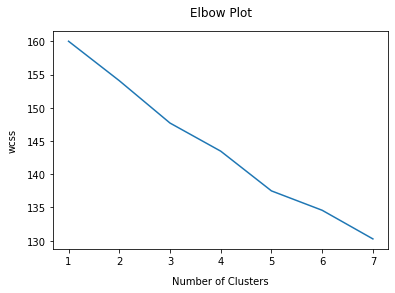

In [21]:
# determine optimal number of clusters
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

## K-Means Clustering Analysis

In [22]:
# Set kmeans parameters
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = None)     # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-8:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : glove, accessori, weld, helmet, support, glass, rain
1 : protect, eyewear, bag, coat, accessori, sleev, arm
2 : resist, chemic, heat, fire, cut, weld, apron
3 : face, shield, headgear, window, set, accessori, flash
4 : purpos, gener, work, dispos, glove, shoe, cover


/Users/andreehoang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


## Plotting Kmeans

In [23]:
# load data
data = load_digits().data
pca = PCA(2)

# transform data
df = pca.fit_transform(data)

#initiate class object
kmeans = KMeans(n_clusters=5)

# predict the label of clusters
label = kmeans.fit_predict(df)
print(label)

[1 0 0 ... 0 1 4]


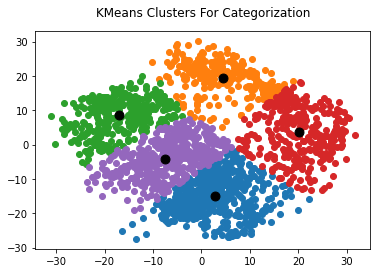

In [24]:
#plotting the centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('KMeans Clusters For Categorization')
plt.show()

## Results
This result is an insight on how a particular parent category can be grouped. K-Means clustering for products need to be performed in order to confirm this result and to determine meaningful sub-categories under each of these group.

* Gloves
* Head Protection
* General Purpose Workwear
* Eyewear
* Protective PPE (chemical, cut, cold-resistant)

***
# MoM/YoY Revenue Analysis

The goal of this analysis is to identify MoM and YoY revenue growth trends in order to determine business and marketing performance per month and which months would likely outperform. This information alongside with products segmentation would allow marketers to determine the months to improve markerting campaigns and for "what".

*This DataFrame is created with simulated values.*

## Import Packages

In [25]:
#dataframe and computation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#plotting and statistical graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [26]:
#import data: monthly revenue for 5 fisal years
monthly_rev = pd.read_csv('monthly_rev_growth.csv')
x = monthly_rev.copy()
data = monthly_rev.set_index(['month'])
data.head(13)

,fy21_monthly_rev,fy20_monthly_rev,fy19_monthly_rev,fy18_monthly_rev,fy17_monthly_rev,fy21_MoM_growth_rate,fy20_MoM_growth_rate,fy19_MoM_growth_rate,fy18_MoM_growth_rate,fy17_MoM_growth_rate
month,,,,,,,,,,
october,34034304,49793164,48290019,40915562,39362896,-27.222357,10.820141,18.697315,-15.950202,5.246978
November,35744835,44260948,45165707,40520798,37871936,5.025903,-11.110393,-6.469892,-0.964826,-3.787729
december,37624383,40149832,39338617,35926120,34761322,5.258237,-9.288360,-12.901580,-11.339061,-8.213507
january,38706389,46306796,46112030,41183439,37872702,2.875811,15.334968,17.218229,14.633695,8.950695
february,40445169,43606940,44298042,39895689,36762022,4.492230,-5.830367,-3.933871,-3.126864,-2.932666
march,46582342,46870396,46151256,44125128,41137270,15.174057,7.483800,4.183512,10.601243,11.901543
april,45334440,42884051,46743989,44378701,37554052,-2.678916,-8.505038,1.284327,0.574668,-8.710393
may,48227648,40697797,47689970,46330542,40579835,6.381921,-5.098058,2.023749,4.398148,8.057141
june,50248003,44613906,44730594,45304839,42022780,4.189205,9.622410,-6.205447,-2.213881,3.555818


In [27]:
#data.info()

## MoM Revenue Comparison

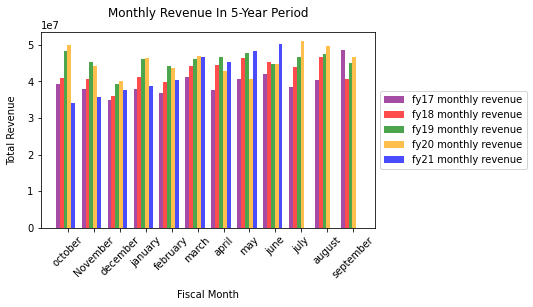

In [28]:
#bar plot for monthly revenue for 5 year period
x_coordinates = monthly_rev["month"]
fy17 = monthly_rev["fy17_monthly_rev"]            #define data groups
fy18 = monthly_rev["fy18_monthly_rev"]
fy19 = monthly_rev["fy19_monthly_rev"]
fy20 = monthly_rev["fy20_monthly_rev"]
fy21 = monthly_rev["fy21_monthly_rev"]



x_axis = np.arange(len(x_coordinates))          #define bars
plt.bar(x_axis - 0.4, fy17, 0.15, label="fy17 monthly revenue", alpha=0.7, color="purple")
plt.bar(x_axis -0.25, fy18, 0.15, label="fy18 monthly revenue", alpha=0.7, color="red")
plt.bar(x_axis -0.1, fy19, 0.15, label="fy19 monthly revenue", alpha=0.7, color="green")
plt.bar(x_axis + 0.05, fy20, 0.15, label="fy20 monthly revenue", alpha=0.7, color="orange")
plt.bar(x_axis + 0.2, fy21, 0.15, label="fy21 monthly revenue", alpha=0.7, color="blue")



plt.xticks(x_axis, x_coordinates, rotation=45)                           #plot lables and legend
plt.xlabel("Fiscal Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue In 5-Year Period")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("monthly_revenue.png", dpi=400, bbox_inches="tight")
plt.show()


## FY21 Revenue Trend

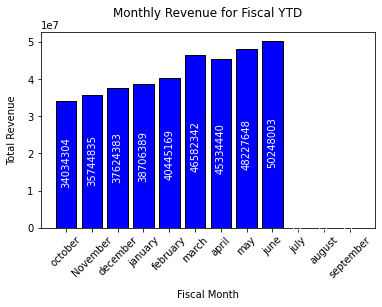

In [29]:
#bar plot for fy21 revenue only
x = monthly_rev['month']
y = monthly_rev['fy21_monthly_rev']
plt.bar(x,y,fc="blue",ec="black")
plt.xticks(rotation = 45)
plt.xlabel("Fiscal Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue for Fiscal YTD")

#bar height label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/3,y[i], ha='center', rotation=90, color='white')
addlabels(x,y)

plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("monthly_revenue_fy21.png", dpi=400, bbox_inches="tight")
plt.show()


## MoM Growth Rate

In [30]:
data.head(13)

,fy21_monthly_rev,fy20_monthly_rev,fy19_monthly_rev,fy18_monthly_rev,fy17_monthly_rev,fy21_MoM_growth_rate,fy20_MoM_growth_rate,fy19_MoM_growth_rate,fy18_MoM_growth_rate,fy17_MoM_growth_rate
month,,,,,,,,,,
october,34034304,49793164,48290019,40915562,39362896,-27.222357,10.820141,18.697315,-15.950202,5.246978
November,35744835,44260948,45165707,40520798,37871936,5.025903,-11.110393,-6.469892,-0.964826,-3.787729
december,37624383,40149832,39338617,35926120,34761322,5.258237,-9.288360,-12.901580,-11.339061,-8.213507
january,38706389,46306796,46112030,41183439,37872702,2.875811,15.334968,17.218229,14.633695,8.950695
february,40445169,43606940,44298042,39895689,36762022,4.492230,-5.830367,-3.933871,-3.126864,-2.932666
march,46582342,46870396,46151256,44125128,41137270,15.174057,7.483800,4.183512,10.601243,11.901543
april,45334440,42884051,46743989,44378701,37554052,-2.678916,-8.505038,1.284327,0.574668,-8.710393
may,48227648,40697797,47689970,46330542,40579835,6.381921,-5.098058,2.023749,4.398148,8.057141
june,50248003,44613906,44730594,45304839,42022780,4.189205,9.622410,-6.205447,-2.213881,3.555818


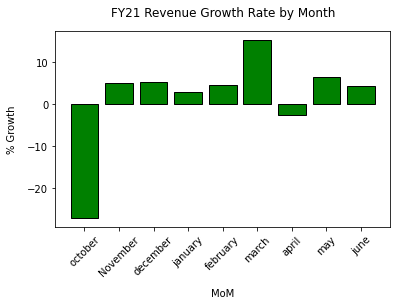

In [31]:
#fy21 MoM growth rate
x = monthly_rev['month']
y = monthly_rev['fy21_MoM_growth_rate']
plt.bar(x,y,fc="green",ec="black")
plt.xticks(rotation = 45)
plt.ylabel("% Growth")
plt.xlabel("MoM")
plt.title("FY21 Revenue Growth Rate by Month")

#data export
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("fy21_growth_rate.png", dpi=400, bbox_inches="tight")

plt.show()

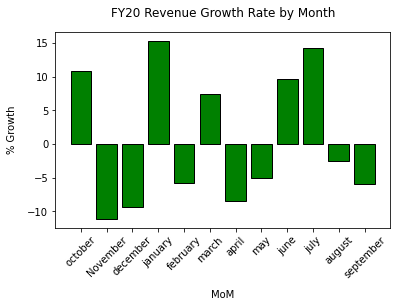

In [32]:
#fy20 MoM growth rate
x = monthly_rev['month']
y = monthly_rev['fy20_MoM_growth_rate']
plt.bar(x,y,fc="green",ec="black")
plt.xticks(rotation = 45)
plt.ylabel("% Growth")
plt.xlabel("MoM")
plt.title("FY20 Revenue Growth Rate by Month")

#data export
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("fy20_growth_rate.png", dpi=400, bbox_inches="tight")

plt.show()

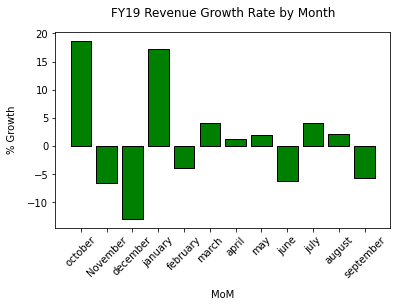

In [33]:
#fy19 MoM growth rate
x = monthly_rev['month']
y = monthly_rev['fy19_MoM_growth_rate']
plt.bar(x,y,fc="green",ec="black")
plt.xticks(rotation = 45)
plt.ylabel("% Growth")
plt.xlabel("MoM")
plt.title("FY19 Revenue Growth Rate by Month")

#data export
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("fy19_growth_rate.png", dpi=400, bbox_inches="tight")

plt.show()

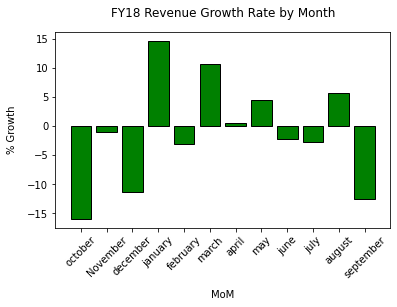

In [34]:
#fy18 MoM growth rate
x = monthly_rev['month']
y = monthly_rev['fy18_MoM_growth_rate']
plt.bar(x,y,fc="green",ec="black")
plt.xticks(rotation = 45)
plt.ylabel("% Growth")
plt.xlabel("MoM")
plt.title("FY18 Revenue Growth Rate by Month")

#data export
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("fy18_growth_rate.png", dpi=400, bbox_inches="tight")

plt.show()

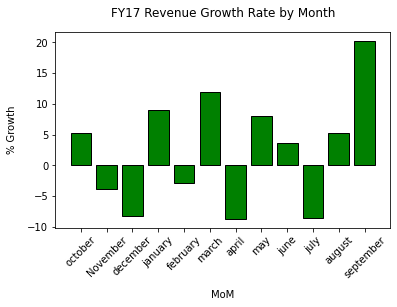

In [35]:
#fy17 MoM growth rate
x = monthly_rev['month']
y = monthly_rev['fy17_MoM_growth_rate']
plt.bar(x,y,fc="green",ec="black")
plt.xticks(rotation = 45)
plt.ylabel("% Growth")
plt.xlabel("MoM")
plt.title("FY17 Revenue Growth Rate by Month")

#data export
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig("fy17_growth_rate.png", dpi=400, bbox_inches="tight")

plt.show()

## YoY Growth Rate

In [36]:
# total revenue for each fiscal year
fy21_total = monthly_rev["fy21_monthly_rev"].iloc[0:9].sum()
fy20_total = monthly_rev["fy20_monthly_rev"].iloc[0:12].sum()
fy19_total = monthly_rev["fy19_monthly_rev"].iloc[0:12].sum()
fy18_total = monthly_rev["fy18_monthly_rev"].iloc[0:12].sum()
fy17_total = monthly_rev["fy17_monthly_rev"].iloc[0:12].sum()

print(fy21_total, fy20_total, fy19_total, fy18_total, fy17_total)

376947513 546597199 547626958 509802806 475536238


In [37]:
# Calculate YoY growth rate
fy20_gr = ((fy20_total - fy19_total) / fy19_total) * 100
fy19_gr = ((fy19_total - fy18_total) / fy18_total) * 100
fy18_gr = ((fy18_total - fy17_total) / fy17_total) * 100
fy17_gr = ((fy17_total - 451234567) / 451234567) * 100

print(fy20_gr, fy19_gr, fy18_gr, fy17_gr)

-0.1880402315767662 7.419369127599505 7.205879439202696 5.3855960463241725


In [38]:
# create df for YoY growth rate
yoy_gr_df = {'fiscal_year':['fy17', 'fy18', 'fy19', 'fy20'],
           'total_revenue':[fy17_total, fy18_total, fy19_total, fy20_total],
           'YoY_growth_rate':[fy17_gr, fy18_gr, fy19_gr, fy20_gr]}

df = pd.DataFrame(yoy_gr_df)
df

,fiscal_year,total_revenue,YoY_growth_rate
0,fy17,475536238,5.385596
1,fy18,509802806,7.205879
2,fy19,547626958,7.419369
3,fy20,546597199,-0.188040


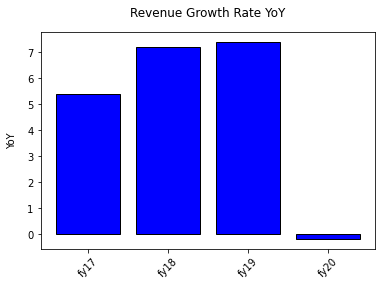

In [39]:
# plot YoY growth rate df
x = yoy_gr_df['fiscal_year']
y = yoy_gr_df['YoY_growth_rate']
plt.bar(x, y, fc = 'blue', ec = 'black')
plt.xticks(rotation = 45)
plt.ylabel('% Growth')
plt.ylabel("YoY")
plt.title("Revenue Growth Rate YoY")

plt.savefig("sample_yoy.png", dpi=400, bbox_inches="tight")
plt.show()

* MoM growth rate would give insights on best/worst performing months each year and growth trends per month each year. This allows marketers to understand which months most likely would likely outperform and how to prepare business and marketing for these months.

***
# KPIs Analysis

The goal of this analysis to calculate for the Cost-Per-Lead for web, non-web, and total leads. This information would give insights on how marketing is performing per month.

*This DataFrame is created with simulated values.*

## Import Packages

In [40]:
#dataframe and computation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#plotting and statistical graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [41]:
lead_data = pd.read_csv('lead_expense_data.csv')
x = lead_data.copy()
data = lead_data.set_index(['month'])
data.head(13)

,web_lead,non_web_lead,total_lead,total_expense,salary,marketing_spend
month,,,,,,
october,7356,10969,18325,8465618,5627769,100000
november,5840,10309,16149,7633838,4850125,100000
december,6580,10077,16657,8017022,5040653,100000
january,6870,9861,16731,7169514,4270029,100000
febuary,7524,10325,17849,7488538,4634636,100000
march,8492,11059,19551,8278921,5210809,100000
april,8525,10384,18909,8547873,5410159,100000
may,8116,9941,18057,7851496,5028851,100000
june,8124,9816,17940,7931603,5009129,100000


## Cost Per Lead

In [42]:
# Add new column for marketing and salary expense
lead_data['salary_marketing_spend'] = (lead_data['salary'] + lead_data['marketing_spend'])
lead_data

,month,web_lead,non_web_lead,total_lead,total_expense,salary,marketing_spend,salary_marketing_spend
0,october,7356,10969,18325,8465618,5627769,100000,5727769
1,november,5840,10309,16149,7633838,4850125,100000,4950125
2,december,6580,10077,16657,8017022,5040653,100000,5140653
3,january,6870,9861,16731,7169514,4270029,100000,4370029
4,febuary,7524,10325,17849,7488538,4634636,100000,4734636
5,march,8492,11059,19551,8278921,5210809,100000,5310809
6,april,8525,10384,18909,8547873,5410159,100000,5510159
7,may,8116,9941,18057,7851496,5028851,100000,5128851
8,june,8124,9816,17940,7931603,5009129,100000,5109129


In [43]:
# compute cpl for web_lead vs. salary_marketing_spend
lead_data['cpl_web_vs_salary_marketing_spend'] = (lead_data['salary_marketing_spend']/lead_data['web_lead'])
lead_data['cpl_web_vs_salary_marketing_spend'] = round(lead_data['cpl_web_vs_salary_marketing_spend'])                                                
   
# compute cpl for non_web_lead vs. salary_marketing_spend
lead_data['cpl_non_web_vs_salary_marketing_spend'] = (lead_data['salary_marketing_spend']/lead_data['non_web_lead'])
lead_data['cpl_non_web_vs_salary_marketing_spend'] = round(lead_data['cpl_non_web_vs_salary_marketing_spend']) 
lead_data

# compute cpl for total_lead vs. salary_marketing_spend
lead_data['cpl_total_lead_vs_salary_marketing_spend'] = (lead_data['salary_marketing_spend']/lead_data['total_lead'])
lead_data['cpl_total_lead_vs_salary_marketing_spend'] = round(lead_data['cpl_total_lead_vs_salary_marketing_spend']) 

# view dataframe
lead_data


,month,web_lead,non_web_lead,total_lead,total_expense,salary,marketing_spend,salary_marketing_spend,cpl_web_vs_salary_marketing_spend,cpl_non_web_vs_salary_marketing_spend,cpl_total_lead_vs_salary_marketing_spend
0,october,7356,10969,18325,8465618,5627769,100000,5727769,779.0,522.0,313.0
1,november,5840,10309,16149,7633838,4850125,100000,4950125,848.0,480.0,307.0
2,december,6580,10077,16657,8017022,5040653,100000,5140653,781.0,510.0,309.0
3,january,6870,9861,16731,7169514,4270029,100000,4370029,636.0,443.0,261.0
4,febuary,7524,10325,17849,7488538,4634636,100000,4734636,629.0,459.0,265.0
5,march,8492,11059,19551,8278921,5210809,100000,5310809,625.0,480.0,272.0
6,april,8525,10384,18909,8547873,5410159,100000,5510159,646.0,531.0,291.0
7,may,8116,9941,18057,7851496,5028851,100000,5128851,632.0,516.0,284.0
8,june,8124,9816,17940,7931603,5009129,100000,5109129,629.0,520.0,285.0


In [44]:
# create a new dataframe for cost per lead
cpl_df = {'Month':lead_data['month'],
           'Web':lead_data['cpl_web_vs_salary_marketing_spend'],
          'Non-Web':lead_data['cpl_non_web_vs_salary_marketing_spend'],
          'All-Lead':lead_data['cpl_total_lead_vs_salary_marketing_spend']}

df = pd.DataFrame(cpl_df)
df

,Month,Web,Non-Web,All-Lead
0,october,779.0,522.0,313.0
1,november,848.0,480.0,307.0
2,december,781.0,510.0,309.0
3,january,636.0,443.0,261.0
4,febuary,629.0,459.0,265.0
5,march,625.0,480.0,272.0
6,april,646.0,531.0,291.0
7,may,632.0,516.0,284.0
8,june,629.0,520.0,285.0


## CPL Chart

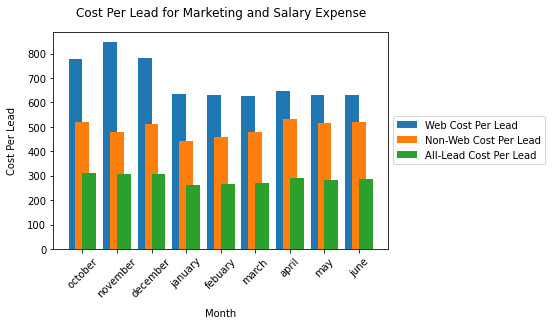

In [45]:
# set chart attributes
x_axis = cpl_df['Month']
web = cpl_df['Web']
non_web = cpl_df['Non-Web']
all_lead = cpl_df['All-Lead']

# define bars
bars = np.arange(len(x_axis))
plt.bar(bars -0.2, web, 0.4, label = 'Web Cost Per Lead')
plt.bar(bars, non_web, 0.4, label = 'Non-Web Cost Per Lead')
plt.bar(bars +0.2, all_lead, 0.4, label = 'All-Lead Cost Per Lead')

# plot labels and legend
plt.xticks(bars, x_axis, rotation=45)
plt.xlabel('Month')
plt.ylabel('Cost Per Lead')
plt.title('Cost Per Lead for Marketing and Salary Expense')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("sample_CPC.png", dpi=400, bbox_inches="tight")
plt.show()


***
# Category Segmentation

The goal of this analysis is to identify high-value categories and sub-categories. Having this insight marketers will be able to determine the landing page to optimize for and to improve.

## Import Packages

In [46]:
#dataframe and computation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#plotting and statistical graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [47]:
# import data for both sales and quantity records
sales_data = pd.read_csv('category_segmentation_top_sales.csv')
quantity_data = pd.read_csv('category_segmentation_top_quantity.csv')
x1 = sales_data.copy()
x2 = quantity_data.copy()
data_x1 = sales_data.set_index(['department'])
data_x2 = quantity_data.set_index(['department'])

In [48]:
# checking total amount for sales and quantity
sales_data.sum(axis=0, skipna=True)
quantity_data.sum(axis=0, skipna=True)

department      Handyman ServicesAutomotive SuppliesAppliances...
unit_ordered                                             25414496
dtype: object

In [49]:
# calcate percentage and add to dffor sales_data
sales_data['percent'] = (sales_data['sales'] / sales_data['sales'].sum()) * 100

# calculate percentage and add to df for quantity_data
quantity_data['percent'] = (quantity_data['unit_ordered'] / quantity_data['unit_ordered'].sum()) * 100

## Pie Charts

<Figure size 7200x7200 with 0 Axes>

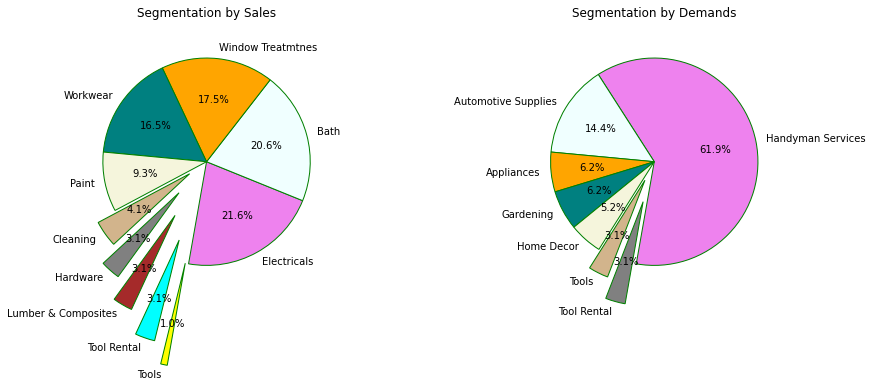

In [50]:
wp = {'linewidth':1, 'edgecolor':'green'}
colors_ax1 = ("violet", "azure", "orange", "teal", "beige", "tan", "grey", "brown", "cyan", "yellow")
explode_ax1 = (0, 0, 0, 0, 0, 0.2, 0.4, 0.6, 0.8, 1)

colors_ax2 = ("violet", "azure", "orange", "teal", "beige", "tan", "grey")
explode_ax2 = (0, 0, 0, 0, 0, 0.2, 0.4)

# sales_data chart
department_sales = ['Electricals', 'Bath', 'Window Treatmtnes', 'Workwear', 'Paint', 'Cleaning', 'Hardware',
                   'Lumber & Composites', 'Tool Rental', 'Tools']
sales_percent = [21, 20, 17, 16, 9, 4, 3, 3, 3, 1]

# quantity_data chart
department_quantity = ['Handyman Services', 'Automotive Supplies', 'Appliances', 'Gardening', 'Home Decor',
                      'Tools', 'Tool Rental']
quantity_percent = [60, 14, 6, 6, 5, 3, 3]

# plot the two sub-chart
plt.figure(figsize=(100,100))
fig, (ax1, ax2) = plt.subplots(1,2,sharey='row')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.4)

ax1.pie(sales_percent,
       labels = department_sales,
       explode = explode_ax1,
       wedgeprops = wp,
       colors = colors_ax1,
       startangle = 260,
       autopct = '%.1f%%')


ax2.pie(quantity_percent,
       labels = department_quantity,
       explode = explode_ax2,
       wedgeprops = wp,
       colors = colors_ax2,
       startangle = 260,
       autopct = '%.1f%%')

# labels
ax1.title.set_text('Segmentation by Sales')
ax2.title.set_text('Segmentation by Demands')

plt.savefig("sample_segmentation.png", dpi=400, bbox_inches="tight")

plt.show()

## Results

The next step is to do sub-category and product segmentation within each of these groups(wedges) to determine high-value pages and products.